# Predicting Heart Disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-datas

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)edicted attribute)edicted attribute)-T Wave abnormalityet

##  Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the tools we need

#Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration(exploratary data analysis or EDA)

The goal here is to find out more about the data adn become a subject matter expert on the dataset you're working with.

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Let's find out how many of each class is there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

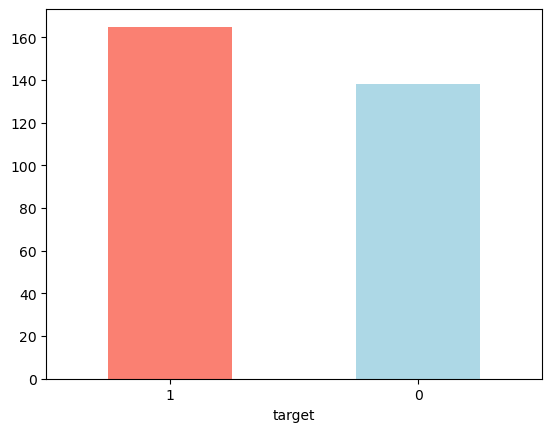

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks(rotation=0);

In [7]:
# about all columns and if there are any missing values in there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


we can infer that based on our existing dataset we can infer that: 
75% of women has heart disease 
45% of men have heart disease
Total around 60% of people has heart disease.
Now with our machine learning model we have to beat this percentage 

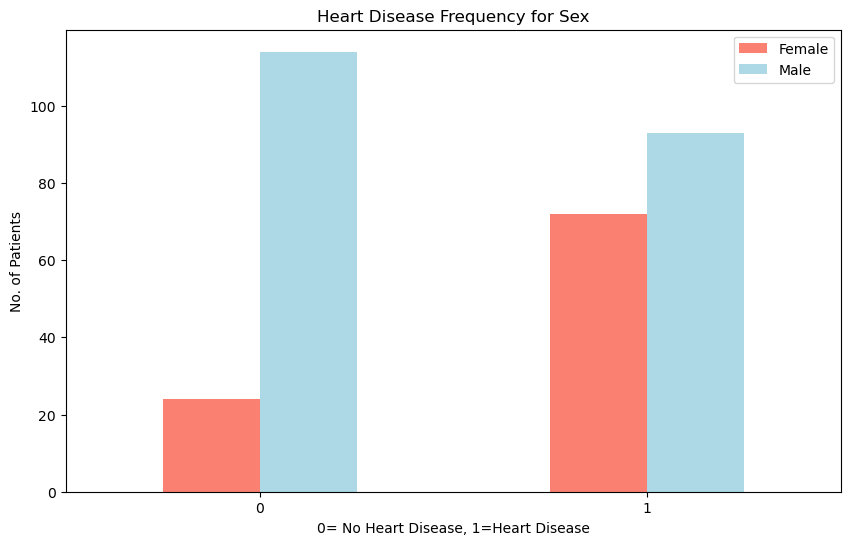

In [12]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["salmon", "lightblue"],
                                          figsize=(10,6));
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Heart Disease, 1=Heart Disease")
plt.ylabel("No. of Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Heart Disease Frequency according to Blood Pressure

In [13]:
#this is how we create a new column based on a certain condition which follows in another column

df_bp= pd.DataFrame(df["trestbps"])
df_bp["target"]=df.target
df_bp.loc[df["trestbps"]<140, "bp"]=0
df_bp.loc[df["trestbps"] >= 140, "bp"] = 1
df_bp

,trestbps,target,bp
0,145,1,1.0
1,130,1,0.0
2,130,1,0.0
3,120,1,0.0
4,120,1,0.0
...,...,...,...
298,140,0,1.0
299,110,0,0.0
300,144,0,1.0
301,130,0,0.0


In [14]:
pd.crosstab(df_bp.target, df_bp.bp)

bp,0.0,1.0
target,,
0,85,53
1,121,44


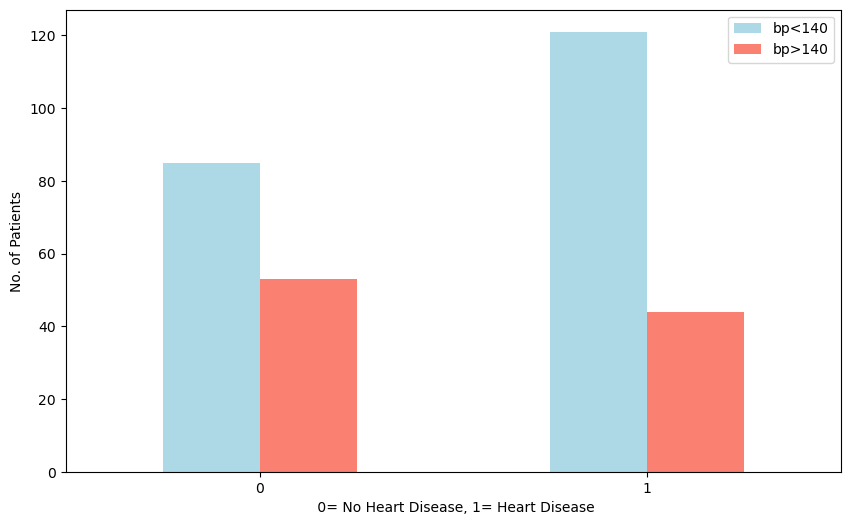

In [15]:
pd.crosstab(df_bp.target, df_bp.bp).plot(kind="bar",
                                         color=["lightblue", "salmon"],
                                         figsize=(10,6));
plt.xlabel(" 0= No Heart Disease, 1= Heart Disease")
plt.xticks(rotation=0)
plt.legend(["bp<140", "bp>140"]);
plt.ylabel("No. of Patients");

### Heart Rate vs Cholestrol for Heart Disease

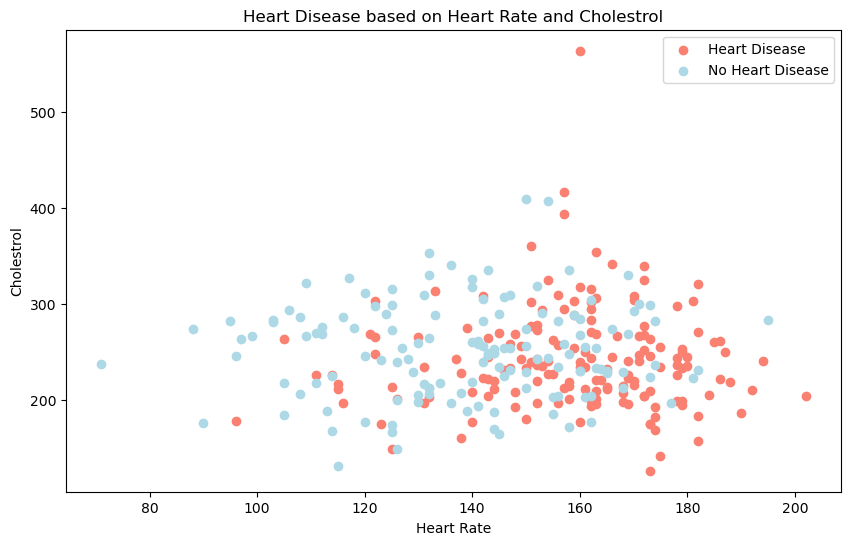

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df.thalach[df.target==1],
            df.chol[df.target==1],
            color="salmon"
           )
plt.scatter(df.thalach[df.target==0],
            df.chol[df.target==0],
            color="lightblue");
plt.xlabel("Heart Rate")
plt.ylabel("Cholestrol")
plt.title("Heart Disease based on Heart Rate and Cholestrol")
plt.legend(["Heart Disease", "No Heart Disease"]);

No such relation is found bw the cholestrol and Heart rate to predict the heart disease

The only key takeaway is that more the heart rate more chances of having heart disease

### Age vs Heart Rate for Heart Disease


In [17]:
#combination more than 2 variable
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

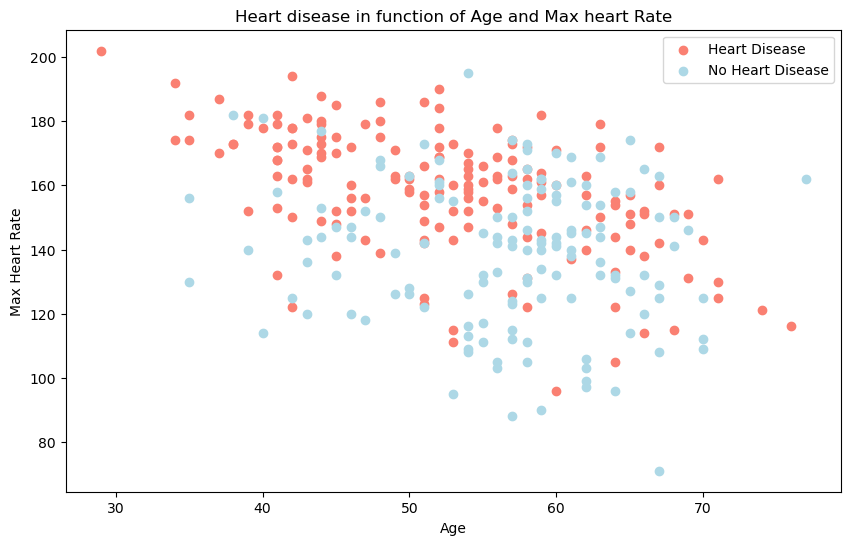

In [19]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon"
           ); 

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue"
           );

#Add some helpful info 
plt.title("Heart disease in function of Age and Max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"]);

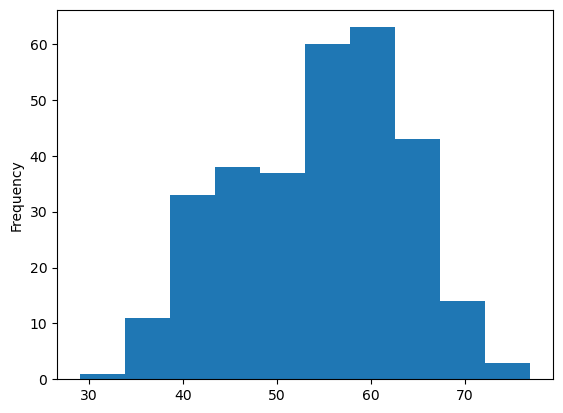

In [20]:
#check the distribution of the age coloumn with a histogram
df.age.plot.hist();

### Heart Rate Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [21]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


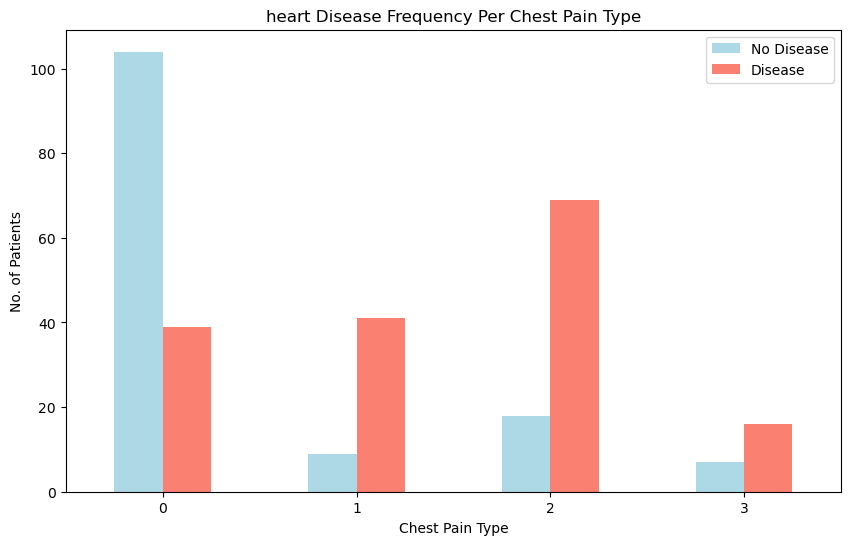

In [22]:
# Making the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue","salmon"]);

#Adding some communication
plt.title("heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("No. of Patients")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


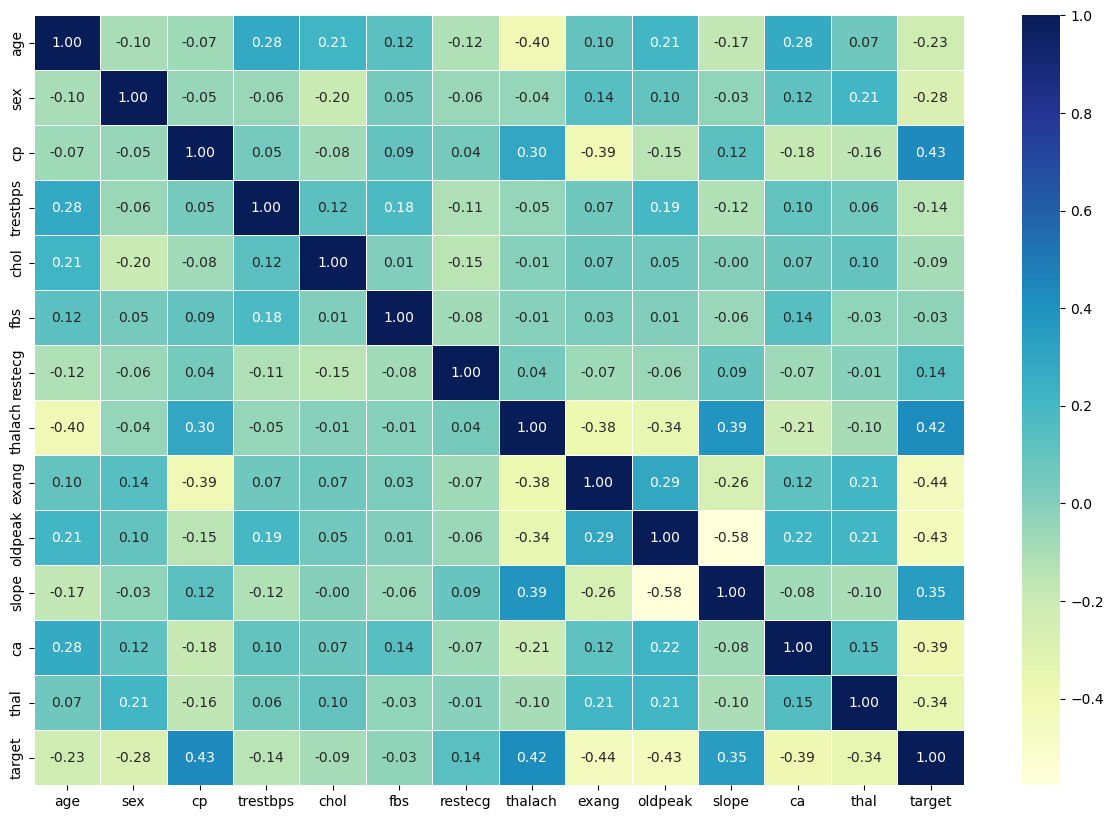

In [25]:
# Making correlation matrix visual
corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu"
               );

positive correlation- as the value goes up the corresponding value also goes up

negative correlation- as the value goes up the corresponding value goes down

high negative or postive correlation is better 

Eg- According to the correlation value here, fi someone gets chest pain during exercise(exang=1), theri chance of having heart disease goes down(target=0)

## 5. Modelling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Split data into X and y
X= df.drop("target", axis=1)
y= df["target"]

In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
#setting up the random seed
np.random.seed(42)

#split the data into train and test split
#it tries to mimic our model to the real world performance
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20)

In [31]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now we've got our data split into training and test split, we are going to build a machine learning model

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set

**Trying's different machine learning models for our data sets**
1. LinearSVC
2. SVC
3. K-nearest Negihbours classifier
4. Random Forest Classifier
5. Logistic Regression

In [32]:
#Putting models in a dictionary
models={"Linear SVC": LinearSVC(),
        "SVC": SVC(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression()
       }

# create a funtion to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. 
    models: a dict of differetn Scikit-Learn machine learning models
    X_train: traininig data( no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: test labels
    """
    #set random see
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores ={}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append tis score to model_scores
        model_scores[name]=model.score(X_test, y_test)
    return model_scores
    

In [33]:
model_scores = fit_and_score(models=models,
                             X_train= X_train,
                             X_test=X_test,
                             y_train= y_train,
                             y_test=y_test)
model_scores

C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

{'Linear SVC': 0.8688524590163934,
 'SVC': 0.7049180327868853,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442}

In [34]:
#Putting models in a dictionary
models={"Linear SVC": LinearSVC(),
        "SVC": SVC(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression()
       }

# create a funtion to fit and score models
def fit_and_score(models,X,y):
    """
    Fits and evaluates given machine learning models. 
    models: a dict of differetn Scikit-Learn machine learning models
    X_train: traininig data( no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: test labels
    """
    #set random see
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores ={}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model_cross_val_score=np.mean(cross_val_score(model,X,y, cv=10))
        #Evaluate the model and append tis score to model_scores
        model_scores[name]=model_cross_val_score
    return model_scores


In [35]:
model_cross_val_scores= fit_and_score(models,X,y)
model_cross_val_scores

C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\laksh\OneDrive\Desktop\heart_disease_proj

{'Linear SVC': 0.7561290322580645,
 'SVC': 0.6604301075268817,
 'KNN': 0.6535483870967742,
 'Random Forest': 0.8216129032258065,
 'Logistic Regression': 0.8316129032258065}

### Model Comparision

In [36]:
model_compare= pd.DataFrame(model_scores, index=["Accuracy"])
model_compare

,Linear SVC,SVC,KNN,Random Forest,Logistic Regression
Accuracy,0.868852,0.704918,0.688525,0.836066,0.885246


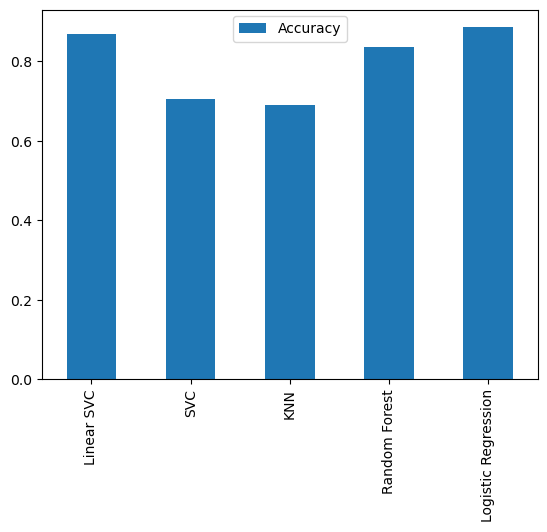

In [37]:
model_compare.T.plot(kind="bar");

In [38]:
model_compare_crossval= pd.DataFrame(model_cross_val_scores, index=["Accuracy"])
model_compare_crossval

,Linear SVC,SVC,KNN,Random Forest,Logistic Regression
Accuracy,0.756129,0.66043,0.653548,0.821613,0.831613


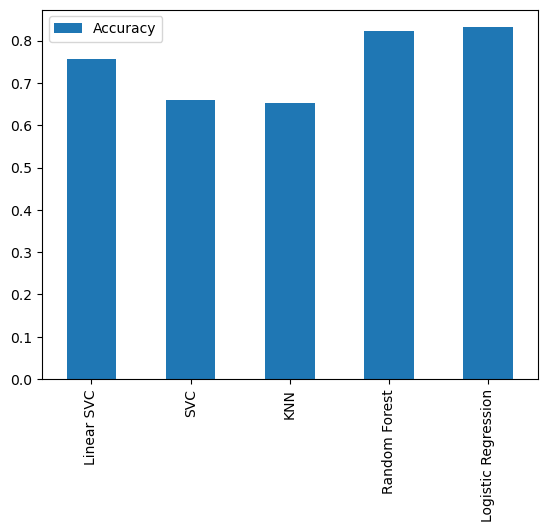

In [39]:
model_compare_crossval.T.plot(kind="bar");

Now we've got a baseline model...and we know a model's first prediction aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Recall
* F1 Score
* Classification Report
* ROC curve
* Area under the curve(AUC)

### Hyperparameter tuning by Hand

In [40]:
#Tuning KNN
train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors= range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

#Loop through differnet n_neighbors
for items in neighbors:
    knn.set_params(n_neighbors=items)
    #Fit the alogrithm
    knn.fit(X_train, y_train)
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [41]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


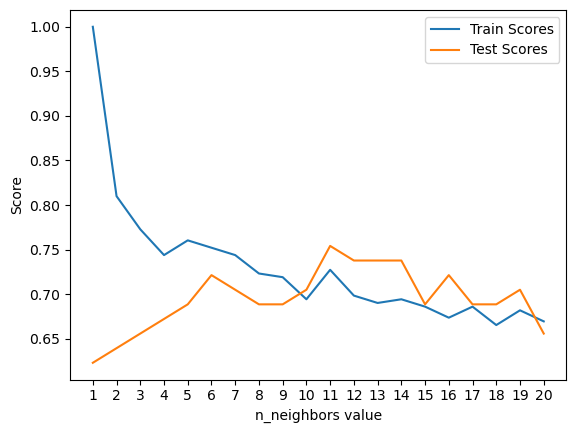

In [43]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("n_neighbors value")
plt.ylabel("Score")
plt.legend()
plt.xticks(np.arange(1,21,1));
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyper Parameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression
* SVC
* RandomForestClassifier

In [44]:
#using randomized search CV for hyperparameter tuning for SVC model
svc_grid={ "kernel": ["linear", "rbf"],
           "gamma": [0.1, 1, 10, 100],
           "C":[0.1, 1, 10, 100, 1000],
           "degree":[0, 1, 2, 3, 4, 5, 6]}

np.random.seed(42)

#Instantiate the model
model= SVC()

#setup the randomizedsearchCV
rs_model= RandomizedSearchCV(estimator=model,
                             param_distributions=svc_grid, 
                             n_iter=10, # number of models to try
                             cv=5,
                             verbose=2)

#fitting the model
rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .............C=0.1, degree=4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=6, gamma=10, kernel=linear; total time=   0.0s
[CV] END .............C=1, degree=6, gamma=10, kernel=linear; total time=   0.2s
[CV] END .............C=1, degree=6, gamma=10, kernel=linear; total time=   0.1s
[CV] END .............C=1, degree=6, gamma=10, kernel=linear; total time=   0.2s
[CV] END .............C=1, degree=6, gamma=10, kernel=linear; total time=   0.1s
[CV] END .........C=1000, degree=2, gamma=0.1, kernel=linear; total time=   3.6s
[CV] END .........C=1000, degree=2, gamma=0.1, k

In [45]:
rs_model.best_params_

{'kernel': 'linear', 'gamma': 10, 'degree': 6, 'C': 1}

In [46]:
rs_y_preds = rs_model.predict(X_test)
accuracy_score(y_test,rs_y_preds)

0.8688524590163934

In [47]:
#Create the hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver":["liblinear"]
               }
#create a hyperparameter grid for RandomForestClassifier
rf_grid= {"n_estimators":np.arange(0,1000,50),
          "max_depth":[None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)
         }

Tuning the parameters using RandomizedSearchCV

In [48]:
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter=20, #number of differnt hyperparameters
                                cv=5, #number of cross val sets
                                n_jobs=1,
                                verbose=2)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [49]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [50]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [51]:
#Randomized Search CV for the RandomForest Model

#setup of random seed
np.random.seed(42)

#instantiate the RandomizedSearchCV
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          n_jobs=1,
                          n_iter=20,
                          cv=5,
                          verbose=2)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=0; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=0; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=0; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=0; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=0; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=500; total time=   0.3s
[CV] END max_depth=5

C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700, 750, 800, 850, 900, 950])},
                   verbose=2)

In [52]:
rs_rf.best_params_

{'n_estimators': 450,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [53]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Using GridSearchCV for our models

In [54]:
rs_model.best_params_, rs_log_reg.best_params_, rs_rf.best_params_

({'kernel': 'linear', 'gamma': 10, 'degree': 6, 'C': 1},
 {'solver': 'liblinear', 'C': 0.23357214690901212},
 {'n_estimators': 450,
  'min_samples_split': 6,
  'min_samples_leaf': 9,
  'max_depth': None})

In [55]:
#using GridSearchCV for our SVC model
svc_grid2={ "kernel": ["linear"],
           "gamma": [1, 10, 100],
           "C":[0.1, 1, 10, 100],
           "degree":[3, 4, 5, 6]}

#instantiate the GridSearchCV
gs_svc= GridSearchCV(estimator=SVC(),
                     param_grid=svc_grid2,
                     n_jobs=1,
                     cv=5,
                     verbose=2
                    )
gs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ............C=0.1, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=10, kernel=linear; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=100, kernel=linear; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=100, 

GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5, 6],
                         'gamma': [1, 10, 100], 'kernel': ['linear']},
             verbose=2)

In [56]:
gs_svc.best_params_

{'C': 100, 'degree': 3, 'gamma': 1, 'kernel': 'linear'}

In [57]:
gs_svc.score(X_test,y_test) 

0.8688524590163934

In [58]:
#grid search cv for the logistic Regression model
np.random.seed(42)

#making another grid increasing number of params
log_reg_grid_2={'penalty' : ['l2','none'],
                'C' : np.logspace(-4, 4, 30),
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [100, 1000,2500, 5000]}

#Instantiate the model 
gs_log_reg= GridSearchCV(estimator= LogisticRegression(),
                         param_grid=log_reg_grid_2,
                         cv=5,
                         n_jobs=-1,
                         verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
600 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [59]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [60]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [63]:
#GridSearchCV for the RandomForestClassifier
#setup the random seed
np.random.seed(42)

#setup the param grid
rf_grid2= {"n_estimators":np.arange(0,500,50),
          "max_depth":[None,3,5],
          "min_samples_split": np.arange(2,10,2),
          "min_samples_leaf": np.arange(0,10)
         }
#instantiate the GridSearchCV
gs_rf= GridSearchCV(estimator= RandomForestClassifier(),
                    param_grid=rf_grid2,
                    n_jobs=-1,
                    cv=5,
                    verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1140 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-pac

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450])},
             verbose=True)

In [64]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 50}

In [65]:
gs_rf.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC socre
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible.

To maek comparision and evaluate our trained model, fist we need to make prediction.

In [66]:
#Make predictions with tuened models
y_preds= gs_log_reg.predict(X_test) 

In [67]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

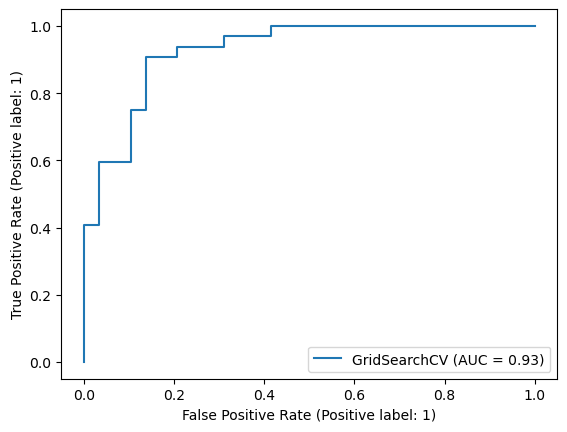

In [69]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test, 
                               y=y_test);

In [70]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


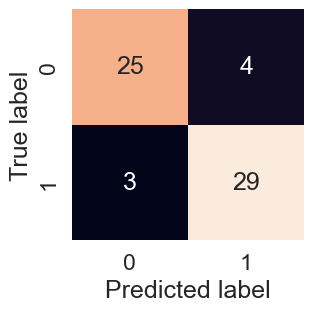

In [71]:
#custom confusion matrix using seaborn

sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [72]:
#Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation
Calculating Precision, recall, accuracy and f1-score of our model using `cross_val_score()`

In [73]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [75]:
#Creating a new classifier the best parameters
clf= LogisticRegression(C=0.20433597178569418,
                        max_iter=100,
                        penalty= "l2", 
                        solver='lbfgs')

In [81]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [91]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [92]:
#Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [93]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [94]:
# Cross validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [95]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [96]:
#Cross validated f1-score
cv_f1_score = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1_score

C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [97]:
cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [102]:
#visualise the cross-validated metrics
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1": cv_f1_score},
                        index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


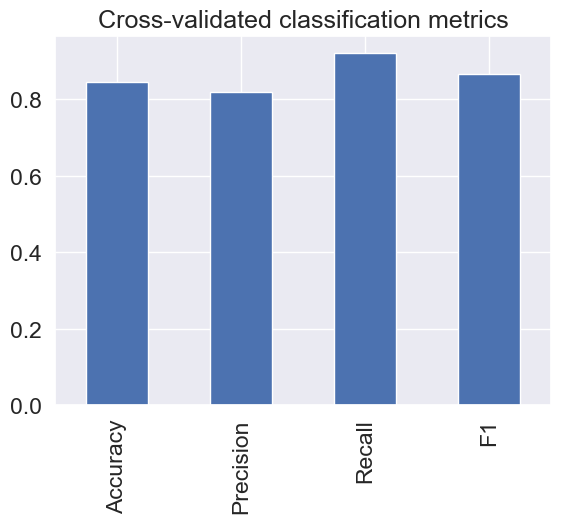

In [106]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                   legend=False);

### Feature Importance
It is another way of asking,"which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning models.To find the feature importance search "(Model Name) feature importance"

Let's find the feature importance for our LogisticRegression model...

In [108]:
#Fit an instance of LogisticRegression
clf= LogisticRegression(C=0.20433597178569418,
                        max_iter=100,
                        penalty= "l2", 
                        solver='lbfgs')
clf.fit(X_train, y_train);

C:\Users\laksh\OneDrive\Desktop\heart_disease_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
#Check coef_
clf.coef_

array([[ 0.00421898, -0.81965483,  0.64436183, -0.01135367, -0.00149641,
         0.00865617,  0.31792641,  0.02519934, -0.58160875, -0.58643206,
         0.4316189 , -0.63266605, -0.7407774 ]])

In [113]:
#match the coef's of featues to columns
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.004218981355200736,
 'sex': -0.8196548284775205,
 'cp': 0.6443618256405779,
 'trestbps': -0.011353666778586543,
 'chol': -0.001496414517310287,
 'fbs': 0.008656173739117517,
 'restecg': 0.3179264058130266,
 'thalach': 0.02519933713273905,
 'exang': -0.5816087522727867,
 'oldpeak': -0.5864320612200635,
 'slope': 0.4316189009532268,
 'ca': -0.6326660488448682,
 'thal': -0.7407773962873495}

<Axes: title={'center': 'Feature Importance'}>

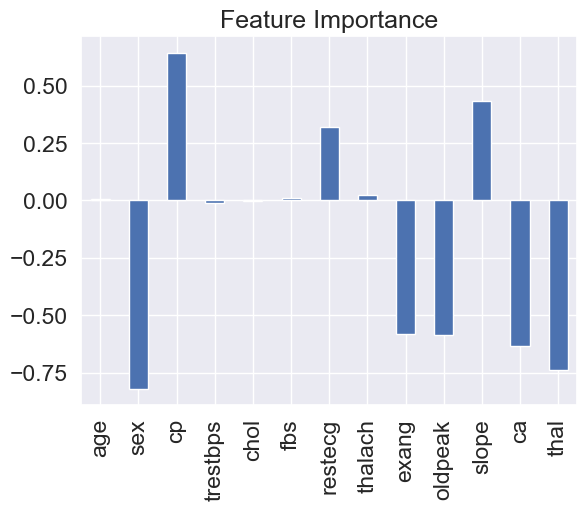

In [116]:
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [118]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [119]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation
If we haven't hit our evaluation metric..some things to see

* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we imporve the current models? (beyond what we have done so far)
* If our model is good enough and meet our evaluation metric needs we can export and share it with others 